# CNN Experiments

We train CNNs on two feature maps (raw data and Fourier-transformed data), using 10-fold cross-validation to select hyperparameters.

## Contents
1. [Set-Up](#Set-Up)
2. [Data](#Data)
3. [Raw Data](#Raw-Data)
4. [Fourier Transform](#Fourier-Transform)

## Set-Up
- Download the [Epileptic Seizure Recognition Data Set](http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition) and place it in the current directory.

In [1]:
import numpy as np
import pandas as pd
import util

Using TensorFlow backend.


## Data
We first parse and normalize our dataset.

In [2]:
X, y, ids, chunks = util.parse_data()
X = X.reshape(X.shape[0], X.shape[1], 1)
classes = np.unique(y)

We split our data 80/20 train/test.

In [3]:
X_train, y_train, ids_train, X_test, y_test, ids_test = util.split_data(X, y, ids, seed=0)

We set up scoring.

In [4]:
scoring = util.get_scoring_metrics(classes)

## Raw Data

In [ ]:
r_cv_results, r_acc, r_f1_macro, r_f1_per_class, r_cm = util.evaluate_cnn(
    X_train, y_train, ids_train, X_test, y_test, classes, scoring, 'raw')

Train loss: 0.1745 - accuracy: 0.9272

In [6]:
r_cv_df = pd.DataFrame.from_dict(r_cv_results)
r_cv_df.to_csv('raw_cnn_cv_results.csv')
r_cv_df

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_f1_class_1,mean_test_f1_class_2,mean_test_f1_class_3,mean_test_f1_class_4,mean_test_f1_class_5,mean_test_f1_macro,mean_train_accuracy,...,std_test_f1_class_4,std_test_f1_class_5,std_test_f1_macro,std_train_accuracy,std_train_f1_class_1,std_train_f1_class_2,std_train_f1_class_3,std_train_f1_class_4,std_train_f1_class_5,std_train_f1_macro
0,53.803345,0.559204,0.722826,0.961601,0.452595,0.552209,0.816907,0.768401,0.710343,0.774251,...,0.063360,0.085057,0.047489,0.016005,0.002325,0.083146,0.094787,0.031874,0.021897,0.019586
1,62.680588,0.600108,0.741739,0.952045,0.580203,0.631250,0.780381,0.725820,0.733940,0.901196,...,0.049133,0.064685,0.022425,0.008003,0.005987,0.021356,0.023343,0.007577,0.008734,0.008321
2,65.814845,0.621961,0.756087,0.958195,0.631321,0.637801,0.792665,0.723849,0.748766,0.943273,...,0.041170,0.091823,0.031416,0.009037,0.002060,0.018994,0.014500,0.012334,0.014302,0.009081
3,67.391203,0.613099,0.750435,0.954782,0.655117,0.646732,0.765672,0.695630,0.743587,0.964215,...,0.051634,0.082109,0.029507,0.010502,0.000972,0.020173,0.022088,0.010068,0.010472,0.010668
4,53.465182,0.544257,0.735435,0.956547,0.422365,0.603437,0.841551,0.757749,0.716330,0.783418,...,0.047769,0.103476,0.035070,0.012634,0.003447,0.093979,0.026173,0.021860,0.018256,0.018421
5,62.820251,0.613120,0.743587,0.950453,0.577644,0.648012,0.768547,0.712608,0.731453,0.894831,...,0.063735,0.067863,0.026966,0.011176,0.000795,0.041037,0.016706,0.006512,0.012242,0.012337
6,65.157553,0.624796,0.750326,0.951775,0.645848,0.634518,0.771881,0.711212,0.743047,0.932114,...,0.066910,0.101037,0.026255,0.015261,0.009069,0.020380,0.022413,0.018222,0.025380,0.015200
7,66.794291,0.613432,0.750435,0.950436,0.620876,0.633026,0.789776,0.716024,0.742028,0.953056,...,0.063043,0.079898,0.021763,0.012282,0.002483,0.021039,0.024577,0.010487,0.013576,0.012240
8,53.675814,0.547386,0.724783,0.958352,0.426563,0.579235,0.831883,0.768997,0.713006,0.771171,...,0.064183,0.070653,0.036485,0.014084,0.004024,0.079945,0.048024,0.025704,0.023068,0.015771
9,63.229569,0.611703,0.734130,0.951922,0.560962,0.603852,0.779196,0.720727,0.723332,0.868080,...,0.053736,0.095246,0.031171,0.018549,0.001222,0.045997,0.023993,0.019107,0.025776,0.019916


In [7]:
print('Accuracy: ', r_acc)
print('Macro F1: ', r_f1_macro)
print('F1 per class: ', r_f1_per_class)

Accuracy:  0.7795652173913044
Macro F1:  0.7731901211314189
F1 per class:  [0.97383178 0.70540265 0.62207358 0.7752809  0.7893617 ]


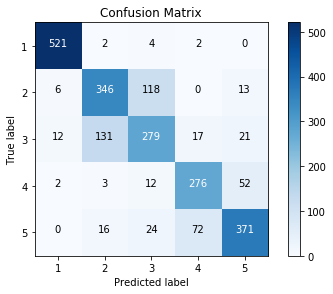

In [8]:
util.visualize_confusion_matrix(r_cm, classes)

## Fourier Transform

In [9]:
X_f_train = np.fft.rfft(X_train, axis=1).astype(float)
X_f_test = np.fft.rfft(X_test, axis=1).astype(float)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [ ]:
f_cv_results, f_acc, f_f1_macro, f_f1_per_class, f_cm = util.evaluate_cnn(
    X_f_train, y_train, ids_train, X_f_test, y_test, classes, scoring, 'fourier')

In [16]:
f_cv_df = pd.DataFrame.from_dict(f_cv_results)
f_cv_df.to_csv('fourier_cnn_cv_results.csv')
f_cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_dropout,param_epochs,param_window,params,split0_test_accuracy,...,split2_train_f1_class_5,split3_train_f1_class_5,split4_train_f1_class_5,split5_train_f1_class_5,split6_train_f1_class_5,split7_train_f1_class_5,split8_train_f1_class_5,split9_train_f1_class_5,mean_train_f1_class_5,std_train_f1_class_5
0,340.901578,9.306314,8.027716,0.309188,5,0.1,25,3,"{'batch_size': 5, 'dropout': 0.1, 'epochs': 25...",0.721739,...,0.945708,0.942556,0.941931,0.927685,0.910109,0.912929,0.953504,0.947923,0.939406,0.016045
1,374.546287,6.061480,9.138260,0.456814,5,0.1,25,5,"{'batch_size': 5, 'dropout': 0.1, 'epochs': 25...",0.688043,...,0.949489,0.962182,0.966456,0.964380,0.967081,0.973158,0.940890,0.969016,0.964620,0.010939
2,456.396541,40.730289,10.641900,1.269472,5,0.1,25,7,"{'batch_size': 5, 'dropout': 0.1, 'epochs': 25...",0.703261,...,0.984357,0.986536,0.987247,0.979290,0.983856,0.926566,0.979347,0.977223,0.977820,0.017502
3,462.358715,16.987634,11.979898,1.606661,5,0.2,25,3,"{'batch_size': 5, 'dropout': 0.2, 'epochs': 25...",0.682609,...,0.869793,0.921528,0.950030,0.931307,0.912291,0.930399,0.947334,0.954229,0.926871,0.023711
4,496.826175,50.249015,13.137796,1.541353,5,0.2,25,5,"{'batch_size': 5, 'dropout': 0.2, 'epochs': 25...",0.700000,...,0.984919,0.966916,0.979770,0.977131,0.965215,0.980870,0.979712,0.978880,0.975159,0.008685
5,547.153505,27.800451,13.898470,1.785452,5,0.2,25,7,"{'batch_size': 5, 'dropout': 0.2, 'epochs': 25...",0.704348,...,0.983159,0.988142,0.985907,0.974484,0.983223,0.983305,0.925711,0.970597,0.973175,0.017650
6,515.349092,14.677991,13.743468,1.242602,5,0.5,25,3,"{'batch_size': 5, 'dropout': 0.5, 'epochs': 25...",0.707609,...,0.902336,0.875821,0.908715,0.894458,0.889441,0.902730,0.890363,0.919374,0.895162,0.012794
7,618.211914,87.565521,15.483522,1.397065,5,0.5,25,5,"{'batch_size': 5, 'dropout': 0.5, 'epochs': 25...",0.688043,...,0.960538,0.951161,0.962643,0.928060,0.953339,0.948725,0.950437,0.950311,0.943577,0.024683
8,564.473972,7.683459,14.680183,0.466195,5,0.5,25,7,"{'batch_size': 5, 'dropout': 0.5, 'epochs': 25...",0.689130,...,0.964037,0.968607,0.977406,0.959859,0.965770,0.965264,0.951575,0.969605,0.967430,0.007713


In [13]:
print('Accuracy: ', f_acc)
print('Macro F1: ', f_f1_macro)
print('F1 per class: ', f_f1_per_class)

Accuracy:  0.7191304347826087
Macro F1:  0.7121213153188182
F1 per class:  [0.9462771  0.50813517 0.60797034 0.76241611 0.73580786]


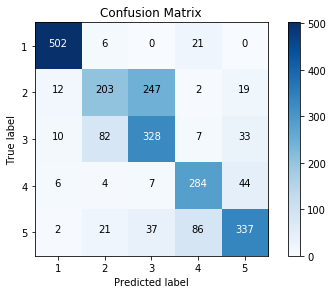

In [14]:
util.visualize_confusion_matrix(f_cm, classes)